In [10]:
include("solutionFunctions.jl")
println("Avaliable threads: ", Threads.nthreads())

Avaliable threads: 32


# Waves on a Ferrofluid Jet

In [13]:
## Initialize 

branchN = 100
a1Vals = collect(range(0.001, 0.33, branchN + 1))

# initialize constants
constants = Constants(36,π,1.5,0.1)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants);

# initial guess 
initial_guess = (1e-10).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-12]


## Compute solution branch
@time solutions, iterations = bifurcation(initial_guess, a1Vals, branchN, constants, 1e-8, :Broyden, 5000);

36.1.0e-8.100.Broyden
Branch point 10 of 100, 5 iterations.
Branch point 20 of 100, 5 iterations.
Branch point 30 of 100, 5 iterations.
Branch point 40 of 100, 5 iterations.
Branch point 50 of 100, 5 iterations.
Branch point 60 of 100, 5 iterations.
Branch point 70 of 100, 5 iterations.
Branch point 80 of 100, 5 iterations.
Branch point 90 of 100, 5 iterations.
Branch point 100 of 100, 12 iterations.
  1.128577 seconds (61.22 M allocations: 2.404 GiB, 26.88% gc time)


Comparing the different methods:

The best solution (lowest `tol`) that we can compute, for the largest # of modes

In [14]:
## Initialize

branchN = 10000
a1Vals = collect(range(0.001, 0.33, branchN + 1))

# initialze constants
constants = Constants(44,π,1.5,0.1)

# initialize wave speed and wave number
k1 = 1*π/constants.L
cInitial = c0(k1, constants);

# initial guess
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]


## Compute solution branch
@time solutions, iterations = bifurcation(initial_guess, a1Vals, branchN, constants, 1e-12, :Broyden, 10000);

44.1.0e-12.10000.Broyden
Branch point 1000 of 10000, 4 iterations.
Branch point 2000 of 10000, 3 iterations.
Branch point 3000 of 10000, 3 iterations.
Branch point 4000 of 10000, 3 iterations.
Branch point 5000 of 10000, 4 iterations.
Branch point 6000 of 10000, 5 iterations.
Branch point 7000 of 10000, 89 iterations.
Branch point 8000 of 10000, 62 iterations.


CompositeException: TaskFailedException

    nested task error: AmosException with id 2: overflow.
    Stacktrace:
      [1] _besseli(nu::Float64, z::ComplexF64, kode::Int32)
        @ SpecialFunctions ~/.julia/packages/SpecialFunctions/QH8rV/src/bessel.jl:240
      [2] besseli
        @ ~/.julia/packages/SpecialFunctions/QH8rV/src/bessel.jl:364 [inlined]
      [3] besseli
        @ ~/.julia/packages/SpecialFunctions/QH8rV/src/bessel.jl:586 [inlined]
      [4] _broadcast_getindex_evalf
        @ ./broadcast.jl:709 [inlined]
      [5] _broadcast_getindex
        @ ./broadcast.jl:682 [inlined]
      [6] _getindex
        @ ./broadcast.jl:706 [inlined]
      [7] _getindex
        @ ./broadcast.jl:705 [inlined]
      [8] _broadcast_getindex
        @ ./broadcast.jl:681 [inlined]
      [9] _getindex
        @ ./broadcast.jl:705 [inlined]
     [10] _broadcast_getindex
        @ ./broadcast.jl:681 [inlined]
     [11] getindex
        @ ./broadcast.jl:636 [inlined]
     [12] macro expansion
        @ ./broadcast.jl:1004 [inlined]
     [13] macro expansion
        @ ./simdloop.jl:77 [inlined]
     [14] copyto!
        @ ./broadcast.jl:1003 [inlined]
     [15] copyto!
        @ ./broadcast.jl:956 [inlined]
     [16] copy
        @ ./broadcast.jl:928 [inlined]
     [17] materialize
        @ ./broadcast.jl:903 [inlined]
     [18] macro expansion
        @ ~/Documents/ferrofluidstabilty/solutions/solutionFunctions.jl:225 [inlined]
     [19] (::var"#202#threadsfor_fun#43"{var"#202#threadsfor_fun#42#44"{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Irrational{:π}, Float64, Vector{Float64}, UnitRange{Int64}}})(tid::Int64; onethread::Bool)
        @ Main ./threadingconstructs.jl:215
     [20] #202#threadsfor_fun
        @ ./threadingconstructs.jl:182 [inlined]
     [21] (::Base.Threads.var"#1#2"{var"#202#threadsfor_fun#43"{var"#202#threadsfor_fun#42#44"{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Irrational{:π}, Float64, Vector{Float64}, UnitRange{Int64}}}, Int64})()
        @ Base.Threads ./threadingconstructs.jl:154

...and 24 more exceptions.


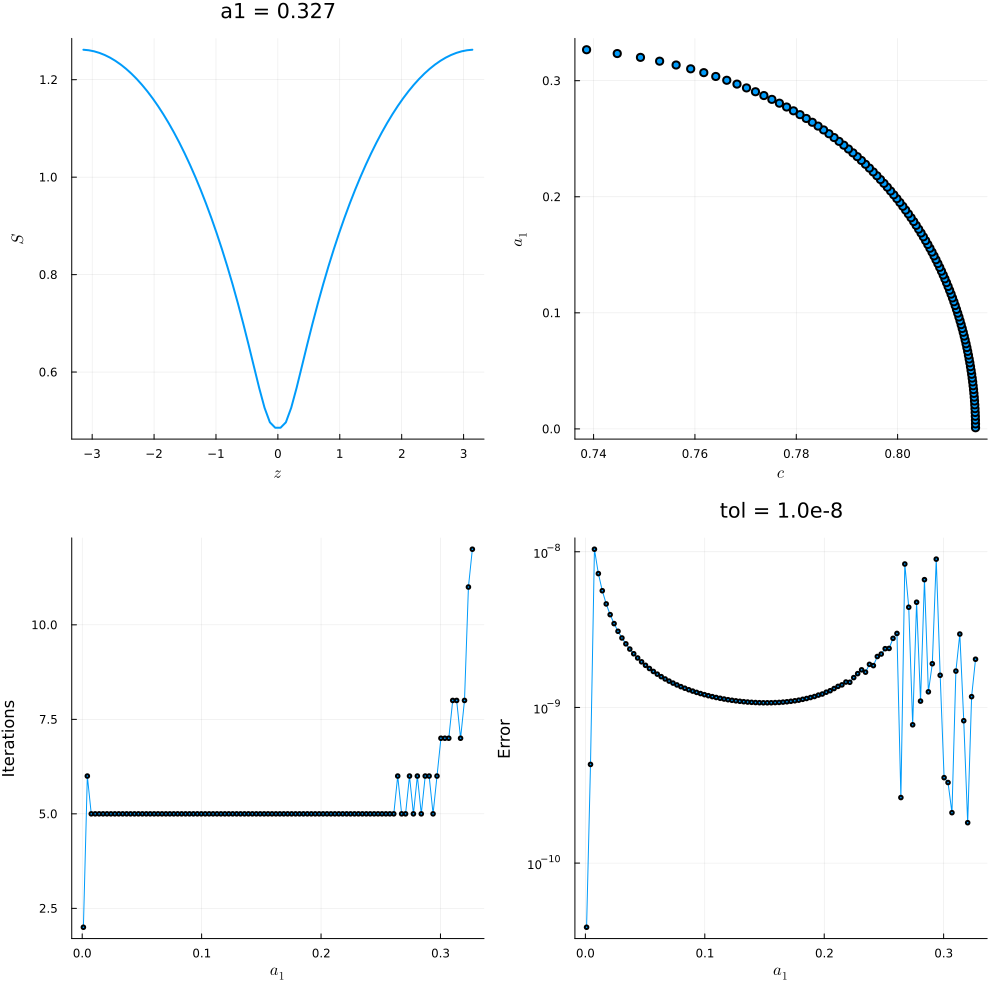

In [56]:
# plotting
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot, flag_plot = plotting("36.1.0e-8.100.Broyden")
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

In [56]:
# read the metadata for "36.1.0e-8.100.Broyden" using the JSON package
metadata = JSON.parsefile("results/36.1.0e-8.100.Broyden/meta_36.1.0e-8.100.Broyden.json")
metadata["a1Vals"]
metadata["iterations"]

100-element Vector{Any}:
  2.0
  6.0
  5.0
  5.0
  5.0
  5.0
  5.0
  5.0
  5.0
  5.0
  ⋮
  7.0
  6.0
  6.0
  7.0
  7.0
 10.0
  9.0
  9.0
 12.0

In [13]:
# compute solutions for a range of tolerances, branchN and N 
tolerances = [1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14]
branchNs = [10, 100, 1000, 10000]
Ns = [36, 38, 64, 128]

# loop over all combinations of tolerances, branchNs and Ns
for i = 1:length(tolerances)
    for j = 1:length(branchNs)
        for k = 1:length(Ns)
            # initialize constants
            constants = Constants(Ns[k],π,1.5,0.1)
            
            # initialize wave speed and wave number 
            k1 = 1*π/constants.L
            cInitial = c0(k1, constants);
            
            # initial guess 
            initial_guess = (1e-16).*ones(branchNs[j]+1, constants.N+2)
            initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]
            
            # time taken
            time = @elapsed solutions = bifurcation(initial_guess, a1Vals, branchNs[j], constants, tolerances[i], :Broyden, 20000)

            # save the results to the time.txt file along with the metadata
            open("results/time.txt", "a") do io
                println(io, "tolerance: ", tolerances[i], " branchN: ", branchNs[j], " N: ", Ns[k], " time: ", time)
            end
        end
    end
end

36.1.0e-8.10.Broyden
Branch point 1 of 10, 2 iterations.
Branch point 2 of 10, 6 iterations.
Branch point 3 of 10, 5 iterations.
Branch point 4 of 10, 5 iterations.
Branch point 5 of 10, 5 iterations.
Branch point 6 of 10, 5 iterations.
Branch point 7 of 10, 5 iterations.
Branch point 8 of 10, 5 iterations.
Branch point 9 of 10, 5 iterations.
Branch point 10 of 10, 5 iterations.
38.1.0e-8.10.Broyden
Branch point 1 of 10, 2 iterations.
Branch point 2 of 10, 6 iterations.
Branch point 3 of 10, 5 iterations.
Branch point 4 of 10, 5 iterations.
Branch point 5 of 10, 5 iterations.
Branch point 6 of 10, 5 iterations.
Branch point 7 of 10, 5 iterations.
Branch point 8 of 10, 5 iterations.
Branch point 9 of 10, 5 iterations.
Branch point 10 of 10, 5 iterations.
64.1.0e-8.10.Broyden
Branch point 1 of 10, 2 iterations.
Branch point 2 of 10, 6 iterations.
Branch point 3 of 10, 5 iterations.
Branch point 4 of 10, 5 iterations.
Branch point 5 of 10, 5 iterations.
Branch point 6 of 10, 5 iterations.

CompositeException: TaskFailedException

    nested task error: AmosException with id 2: overflow.
    Stacktrace:
      [1] _besseli(nu::Float64, z::ComplexF64, kode::Int32)
        @ SpecialFunctions ~/.julia/packages/SpecialFunctions/QH8rV/src/bessel.jl:240
      [2] besseli
        @ ~/.julia/packages/SpecialFunctions/QH8rV/src/bessel.jl:364 [inlined]
      [3] besseli
        @ ~/.julia/packages/SpecialFunctions/QH8rV/src/bessel.jl:586 [inlined]
      [4] _broadcast_getindex_evalf
        @ ./broadcast.jl:709 [inlined]
      [5] _broadcast_getindex
        @ ./broadcast.jl:682 [inlined]
      [6] _getindex
        @ ./broadcast.jl:706 [inlined]
      [7] _getindex
        @ ./broadcast.jl:705 [inlined]
      [8] _broadcast_getindex
        @ ./broadcast.jl:681 [inlined]
      [9] _getindex
        @ ./broadcast.jl:705 [inlined]
     [10] _broadcast_getindex
        @ ./broadcast.jl:681 [inlined]
     [11] getindex
        @ ./broadcast.jl:636 [inlined]
     [12] macro expansion
        @ ./broadcast.jl:1004 [inlined]
     [13] macro expansion
        @ ./simdloop.jl:77 [inlined]
     [14] copyto!
        @ ./broadcast.jl:1003 [inlined]
     [15] copyto!
        @ ./broadcast.jl:956 [inlined]
     [16] copy
        @ ./broadcast.jl:928 [inlined]
     [17] materialize
        @ ./broadcast.jl:903 [inlined]
     [18] macro expansion
        @ ~/Documents/ferrofluidstabilty/solutions/solutionFunctions.jl:225 [inlined]
     [19] (::var"#180#threadsfor_fun#47"{var"#180#threadsfor_fun#46#48"{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Irrational{:π}, Float64, Vector{Float64}, UnitRange{Int64}}})(tid::Int64; onethread::Bool)
        @ Main ./threadingconstructs.jl:215
     [20] #180#threadsfor_fun
        @ ./threadingconstructs.jl:182 [inlined]
     [21] (::Base.Threads.var"#1#2"{var"#180#threadsfor_fun#47"{var"#180#threadsfor_fun#46#48"{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Irrational{:π}, Float64, Vector{Float64}, UnitRange{Int64}}}, Int64})()
        @ Base.Threads ./threadingconstructs.jl:154

...and 30 more exceptions.


In [79]:
# recompute solutions that have already been computed in the results folder

# get names of the files in the results folder
files = readdir("results")

# loop over the files
for file in files
    
    # get the parameters from the file name (note that the second parameter is the tolerance, which has a decimal point in it, so we need to add the "1" to the start of the string to parse it as a float)
    parameters = split(file, ".")
    N = parse(Int, parameters[1])
    tol = parse(Float64, "1." * parameters[3])
    branchN = parse(Int, parameters[4])
    solver = parameters[5]

    # print each for the first 10 files 
    if file == files[1:10]
        println("N: ", N)
        println("tol: ", tol)
        println("branchN: ", branchN)
        println("solver: ", solver)
    end

    # initialize everything
    a1Vals = collect(range(0.001, 0.33, branchN + 1))

    # initialze constants
    constants = Constants(N,π,1.5,0.1)

    # initialize wave speed and wave number 
    k1 = 1*π/constants.L
    cInitial = c0(k1, constants);

    # initial guess 
    initial_guess = (1e-16).*ones(branchN+1, constants.N + 2)
    initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]

    # solve 
    solutions = bifurcation(initial_guess, a1Vals, branchN, constants, tol, Symbol(solver), 40000)


end

16.1.0e-15.100.Broyden
Branch point 10 of 100, 11 iterations.
Branch point 20 of 100, 12 iterations.
Branch point 30 of 100, 18 iterations.
Branch point 40 of 100, 16 iterations.
Branch point 50 of 100, 21 iterations.
Branch point 60 of 100, 22 iterations.
Branch point 70 of 100, 20 iterations.
Branch point 80 of 100, 33 iterations.
Branch point 90 of 100, 30 iterations.
Branch point 100 of 100, 55 iterations.
22.1.0e-15.100.Broyden
Branch point 10 of 100, 11 iterations.
Branch point 20 of 100, 10 iterations.
Branch point 30 of 100, 16 iterations.
Branch point 40 of 100, 14 iterations.
Branch point 50 of 100, 18 iterations.
Branch point 60 of 100, 26 iterations.
Branch point 70 of 100, 53 iterations.
Branch point 80 of 100, 81 iterations.
Branch point 90 of 100, 166 iterations.
Branch point 100 of 100, 166 iterations.
26.1.0e-15.100.Broyden
Branch point 10 of 100, 11 iterations.
Branch point 20 of 100, 14 iterations.
Branch point 30 of 100, 14 iterations.
Branch point 40 of 100, 18 ite

┌ Warning: Keyword argument markerstrokestyle not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotat

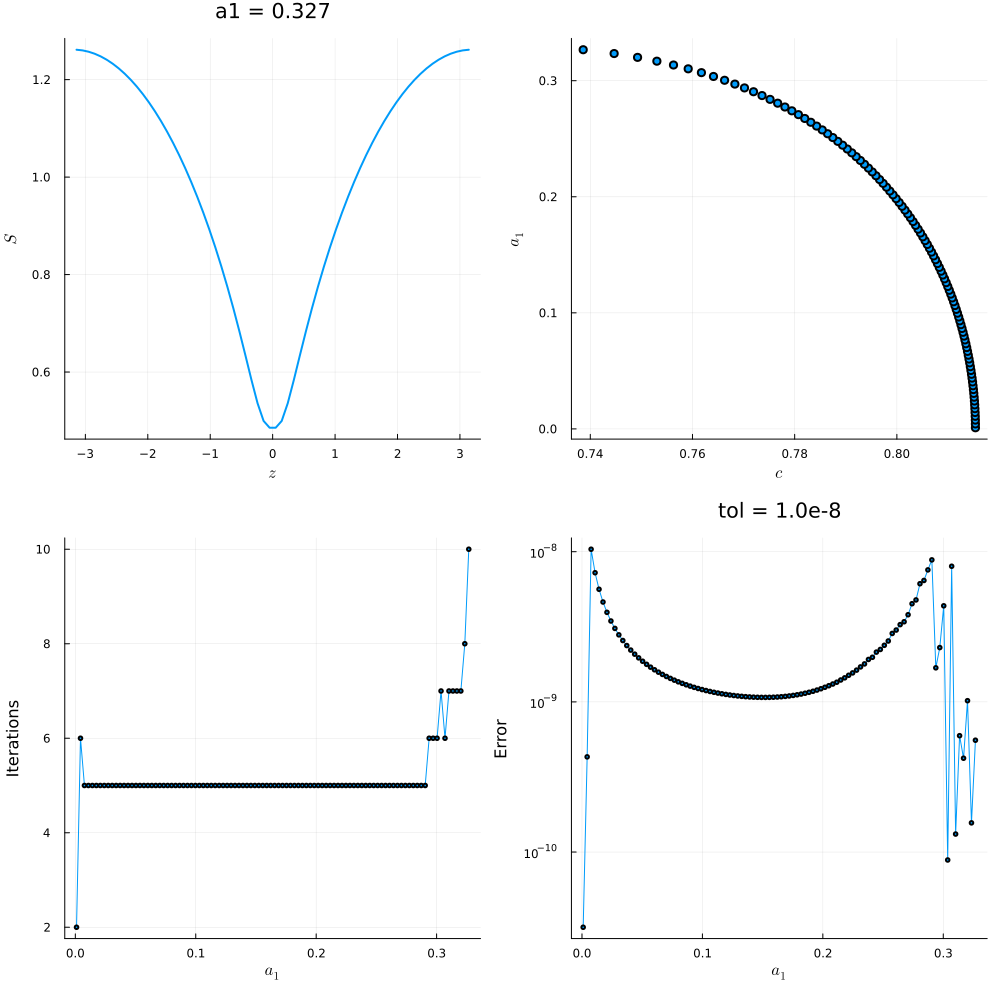

In [9]:
# plot for 32.1.0e-15.100.Broyden
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting("32.1.0e-8.100.Broyden")
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))